In [1]:
Output = ('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1001. InVitroWildfire EVProteomics/P1001.3. Analyses/P1001.3.7. Heatmap/Output')
cur_date = "050424"

library(readxl)
library(tidyverse)
library(reshape2)
library(ggrepel)
library(MetBrewer)
library(pheatmap)
library(gridExtra)

#reading in file
proteomics_df = data.frame(read_excel("Input/070122_Imputed_Proteomics_Data.xlsx")) %>%
    separate(Treatment, c("Treatment", NA))
t_test_df = data.frame(read_excel("Input/071122_Statistical_Results_Only.xlsx")) 

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
# creating 1 df
protein_df = inner_join(proteomics_df, t_test_df)

head(protein_df)

Joining with `by = join_by(Set, Treatment, Protein)`


,Set,Treatment,ID,Protein,Value,log2Value,Gene.name,log2FC,Statistic,P.Value,P.Adj
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Set1,CoCulture,CoCulture_Exposed1,P02751,184361941370,37.42375,FN1,-0.09664782,0.3712160,0.7217334685,0.90261007
2,Set1,CoCulture,CoCulture_Exposed1,P98160,21618632410,34.33156,HSPG2,-0.37199408,1.3220928,0.2155840099,0.72056215
3,Set1,CoCulture,CoCulture_Exposed1,P12111,18326454885,34.09321,COL6A3,0.25760674,-1.5293073,0.1735217887,0.66833001
4,Set1,CoCulture,CoCulture_Exposed1,P21333,6353902621,32.56500,FLNA,-0.38907251,0.9679196,0.3568358777,0.82500368
5,Set1,CoCulture,CoCulture_Exposed1,O00468,16460887621,33.93832,AGRN,-0.43881516,5.2320284,0.0008717592,0.08205816
6,Set1,CoCulture,CoCulture_Exposed1,P35555,6540459348,32.60674,FBN1,-0.41703532,1.6481156,0.1402935776,0.64943412


In [3]:
# creating a df that pheatmap can take
# only looking at differentially expressed proteins (DEPs) p adj < 0.2
coculture_clustering_df = protein_df %>%
    # DEPs
    filter(Treatment == "CoCulture", P.Adj < 0.2) %>%
    select(ID, Protein, log2Value) %>%
    pivot_wider(names_from = ID, values_from = log2Value) %>%
    column_to_rownames(var = "Protein")

triculture_clustering_df = protein_df %>%
    # DEPs
    filter(Treatment == "TriCulture", P.Adj < 0.2) %>%
    select(ID, Protein, log2Value) %>%
    pivot_wider(names_from = ID, values_from = log2Value) %>%
    column_to_rownames(var = "Protein")

head(coculture_clustering_df)

,CoCulture_Exposed1,CoCulture_Exposed2,CoCulture_Exposed3,CoCulture_Exposed4,CoCulture_Exposed5,CoCulture_Exposed6,CoCulture_VehicleCT1,CoCulture_VehicleCT2,CoCulture_VehicleCT3,CoCulture_VehicleCT4,CoCulture_VehicleCT5,CoCulture_VehicleCT6
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
O00468,33.93832,34.09556,33.67387,33.70456,34.07790,33.98590,34.45810,34.41463,34.34868,34.25668,34.44862,34.22189
O15230,31.39320,31.05825,30.69483,30.99482,31.44403,31.05873,32.54716,32.02499,31.82576,32.40579,32.22665,32.15555
Q16787,32.44286,32.01671,32.00001,32.19587,32.27099,32.09177,32.86338,32.58217,32.41814,32.63766,32.45363,32.44382
Q13751,32.82429,32.37386,32.29817,32.49653,32.61334,32.44706,33.09785,32.81574,32.70765,32.92470,32.80280,32.85259
P11047,30.86331,30.83376,30.95439,30.82321,30.92392,30.77663,31.61851,31.62854,31.67293,31.68130,31.67781,31.33112
P55268,30.90328,30.55890,30.11333,30.48217,30.86733,30.61178,32.04415,31.46782,31.25927,31.79163,31.65189,31.60414


# Heatmap

Using hiearchical clustering to see how the treatment groups cluster based on the differentially expressed proteins.

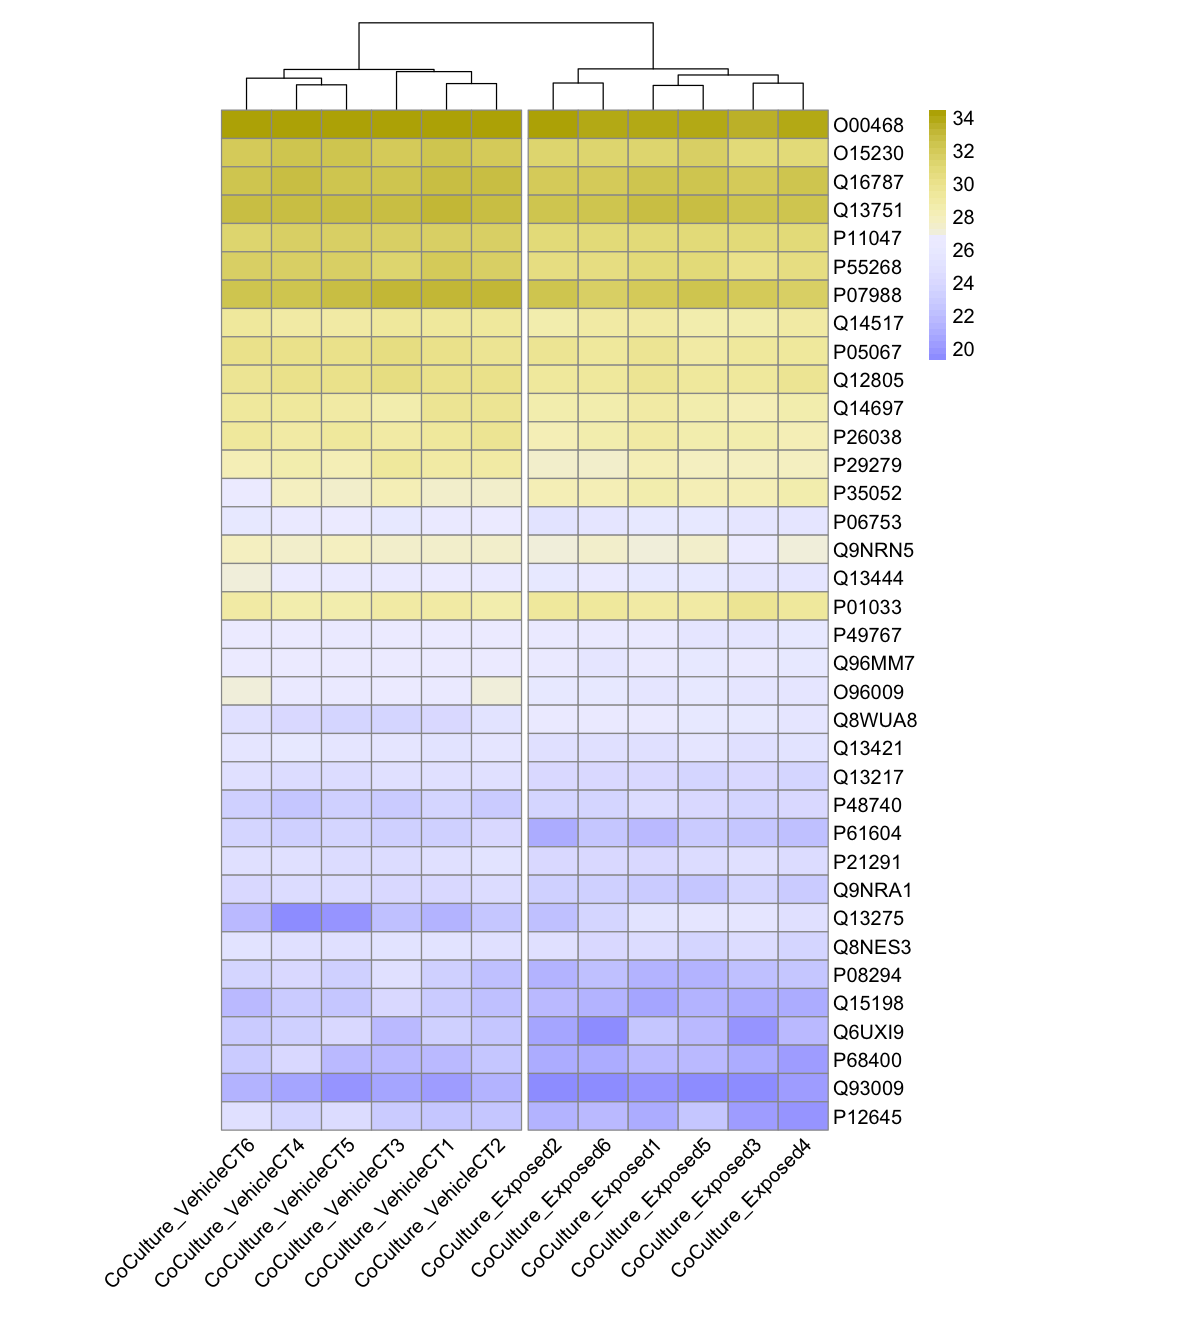

In [9]:
options(repr.plot.width=10, repr.plot.height=11) #changing size
FigureXa = pheatmap(coculture_clustering_df, cluster_rows = FALSE, cluster_cols = TRUE, 
         angle_col = 45, fontsize = 12,  
         cellheight = 17, cellwidth = 30,
         color = hcl.colors(40, "Blue-Yellow 3"),
         #display_numbers = TRUE, number_color = "black", 
         cutree_col = 2) # adds a break bewtween the largest clusters

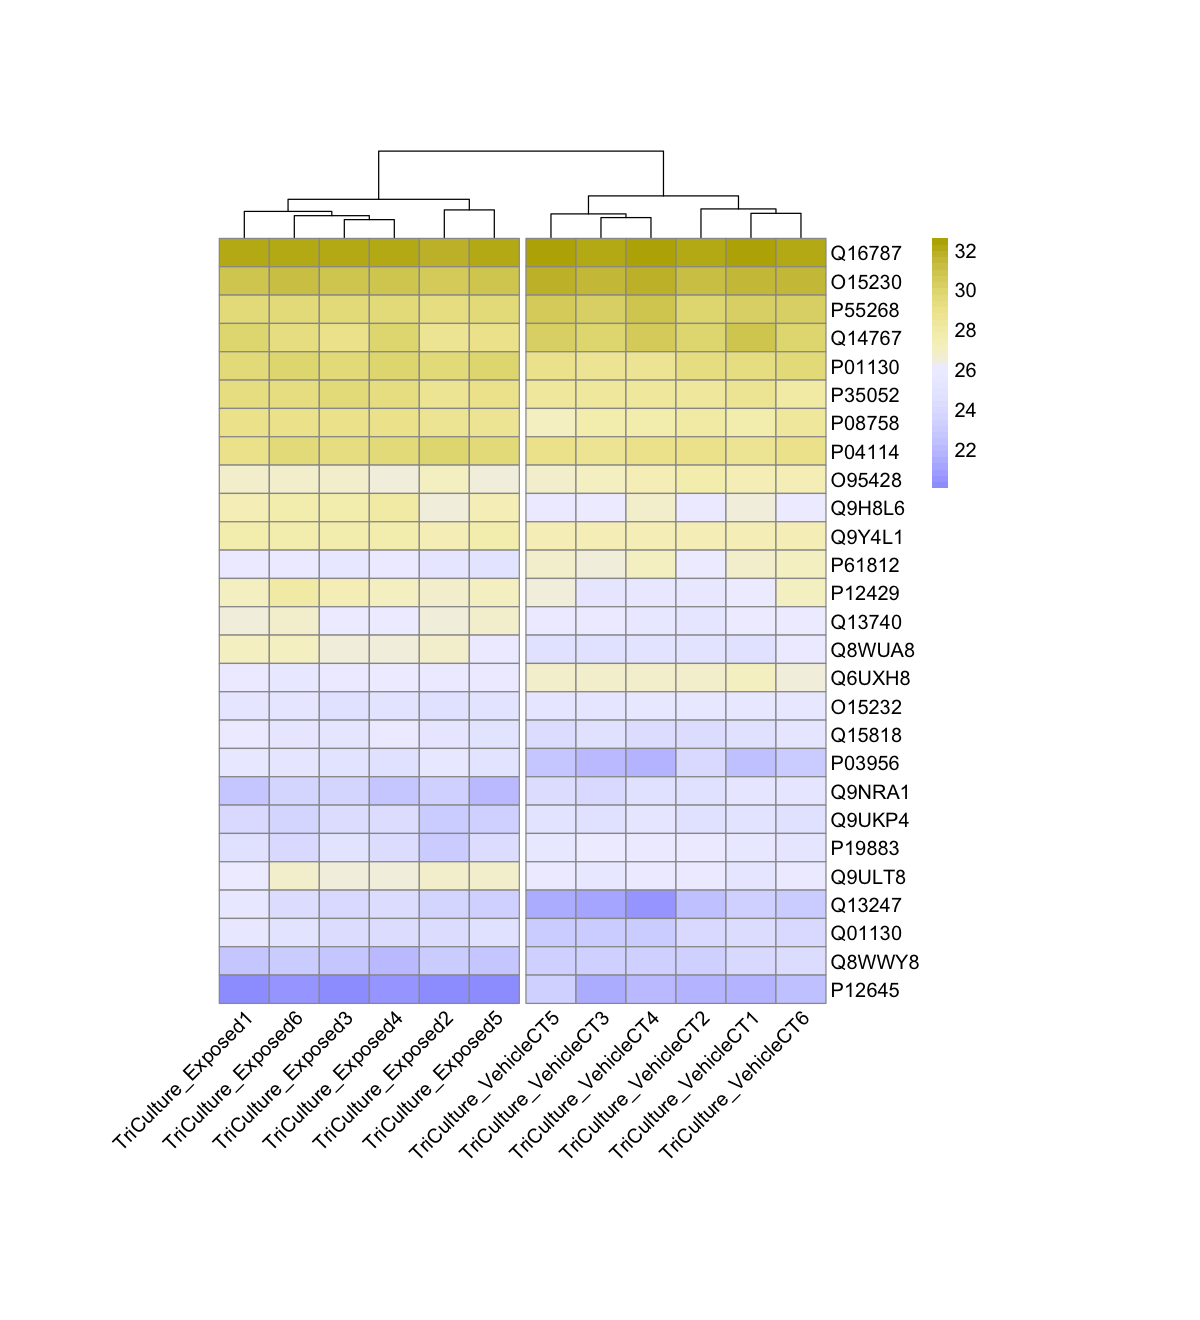

In [10]:
FigureXb = pheatmap(triculture_clustering_df, cluster_rows = FALSE, cluster_cols = TRUE, 
         angle_col = 45, fontsize = 12,  
         cellheight = 17, cellwidth = 30,
         color = hcl.colors(40, "Blue-Yellow 3"),
         #display_numbers = TRUE, number_color = "black", 
         cutree_col = 2) # adds a break bewtween the largest clusters

TableGrob (1 x 2) "arrange": 2 grobs
         z     cells    name           grob
FigureXa 1 (1-1,1-1) arrange gtable[layout]
FigureXb 2 (1-1,2-2) arrange gtable[layout]

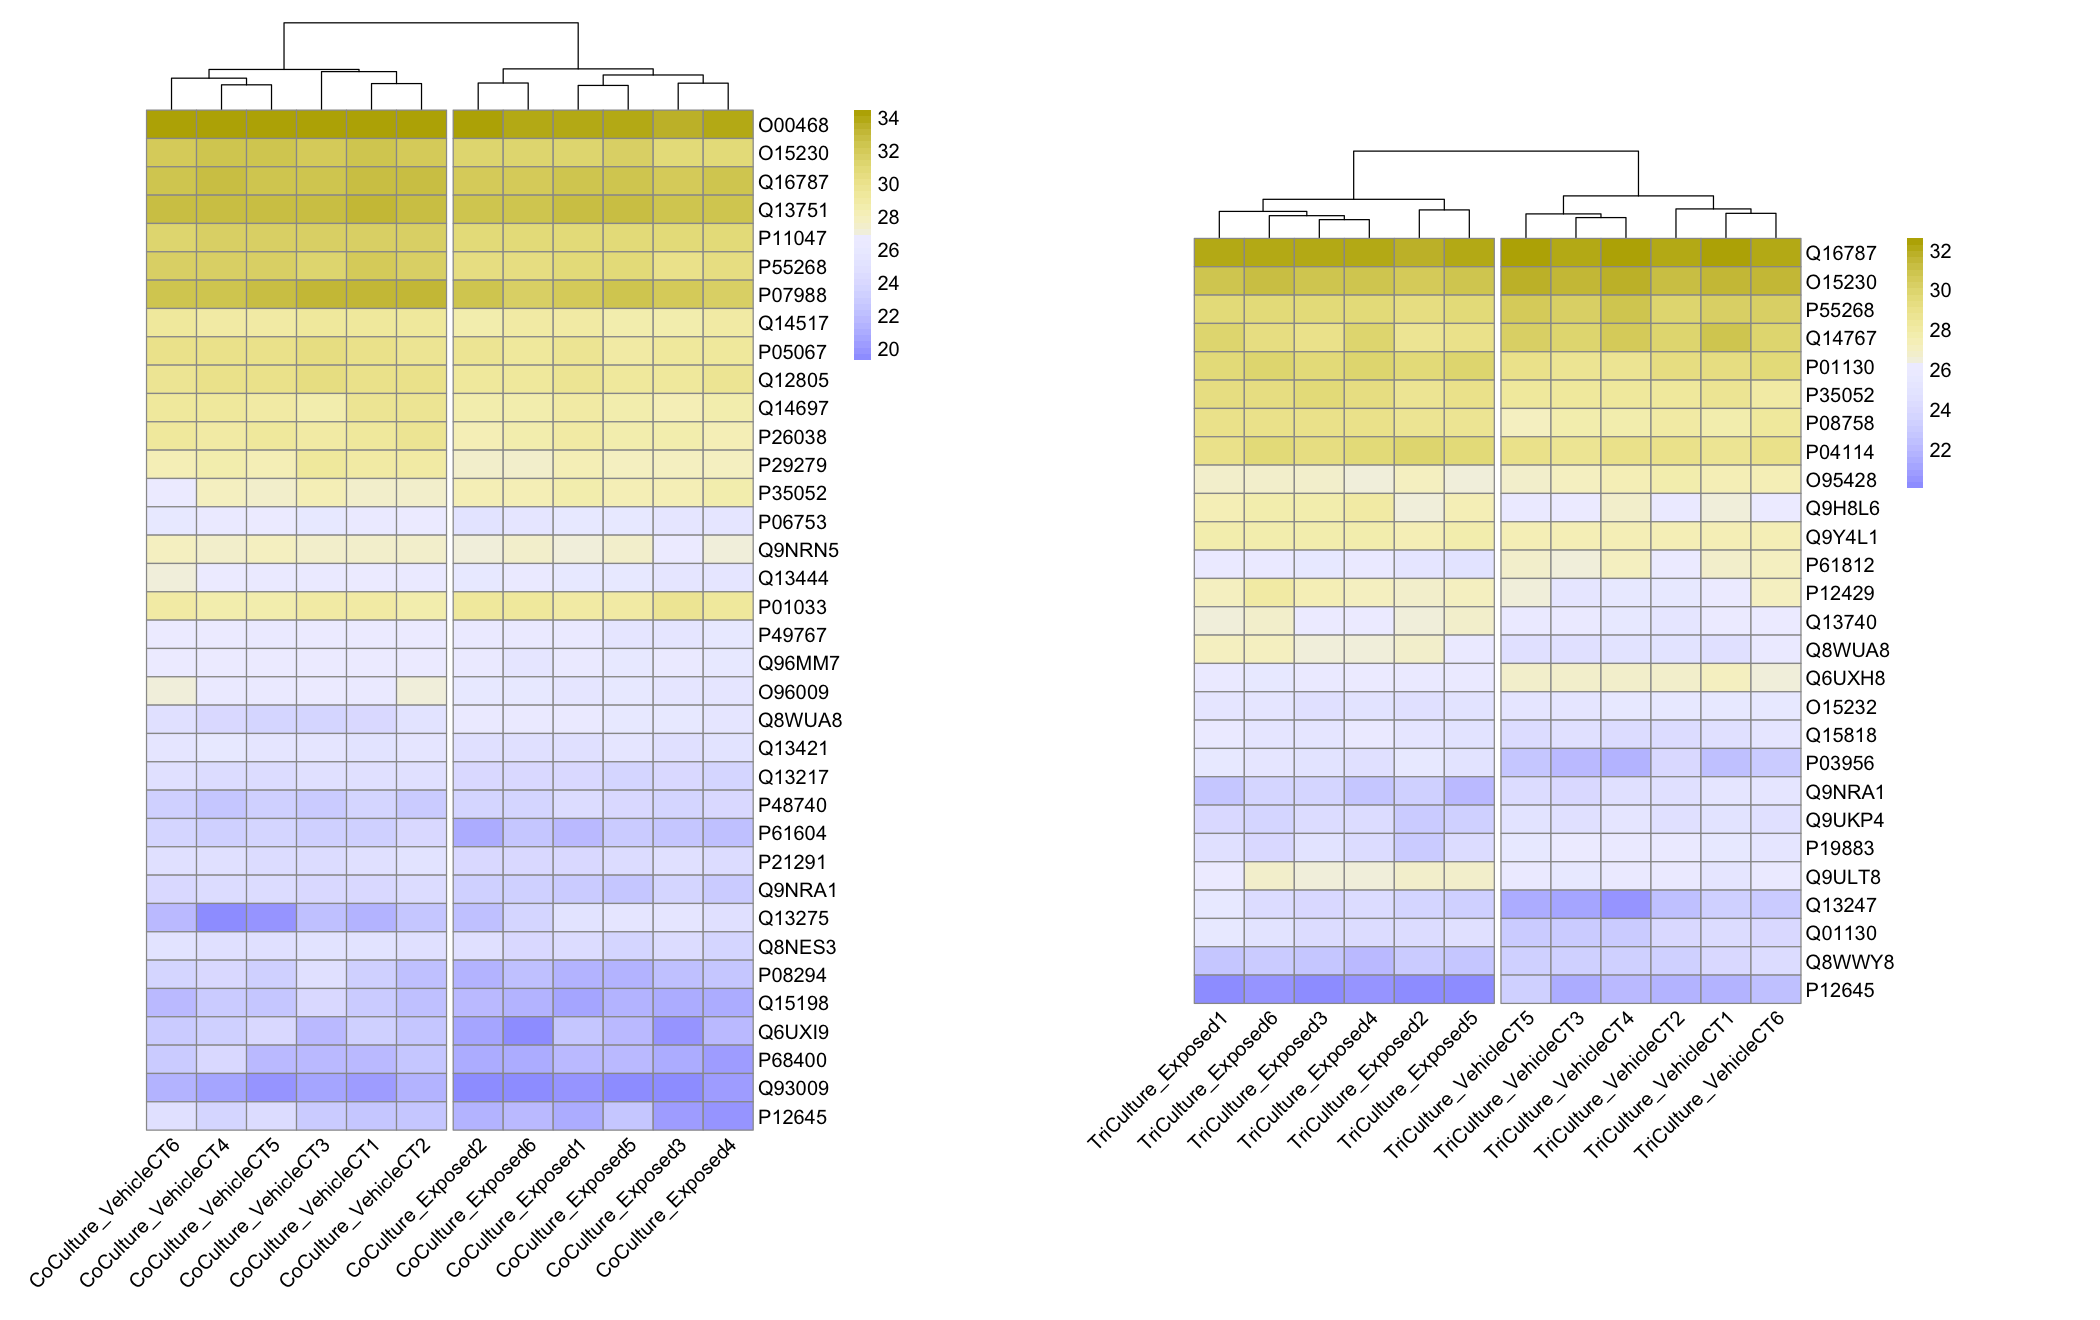

In [11]:
options(repr.plot.width=17.5, repr.plot.height=11) #changing size
# creating 1 figure
plot_list = list()
plot_list[['FigureXa']] = FigureXa[[4]]
plot_list[['FigureXb']] = FigureXb[[4]]

# creating 1 figure
FigureX = grid.arrange(grobs = plot_list, ncol = 2)
FigureX

In [5]:
# exporting figure
# ggsave(Figure6, 
#        filename = 'Figure6.pdf',
#        path = Output,
#        width = 16, height = 8)